#XVI 0.1
##lung cancer update

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 110.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 8.8 

#Batch and Weight Normalization, L2 weight regulization, Activation

Mounted at /content/drive
class_counts: Counter({0: 1599, 2: 1115, 4: 860, 3: 100, 1: 53})
class_weights: {0: 2.33083176985616, 1: 70.32075471698113, 2: 3.3426008968609864, 3: 37.27, 4: 4.333720930232558}


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 205MB/s]


Epoch 1/100, Train Loss: 1.4844933824336275, Val Loss: 1.4280531605084736, Train Acc: 0.3160013418316001, Val Acc: 0.26881720430107525
Epoch 2/100, Train Loss: 1.1466005932777485, Val Loss: 1.3705275257428486, Train Acc: 0.46259644414625967, Val Acc: 0.24193548387096775
Epoch 3/100, Train Loss: 0.8855970961616394, Val Loss: 0.9990767041842142, Train Acc: 0.5847031197584703, Val Acc: 0.5349462365591398
Epoch 4/100, Train Loss: 0.7781738518400395, Val Loss: 0.9063071260849634, Train Acc: 0.6769540422676954, Val Acc: 0.6155913978494624
Epoch 5/100, Train Loss: 0.5871822077860224, Val Loss: 1.0638912171125412, Train Acc: 0.7557866487755787, Val Acc: 0.4543010752688172
Epoch 6/100, Train Loss: 0.5382488342992803, Val Loss: 0.8580859551827112, Train Acc: 0.7903388124790339, Val Acc: 0.6774193548387096
Epoch 7/100, Train Loss: 0.46690611779055696, Val Loss: 0.8759677410125732, Train Acc: 0.8178463602817846, Val Acc: 0.7043010752688172
Epoch 8/100, Train Loss: 0.35548650362390155, Val Loss: 0.

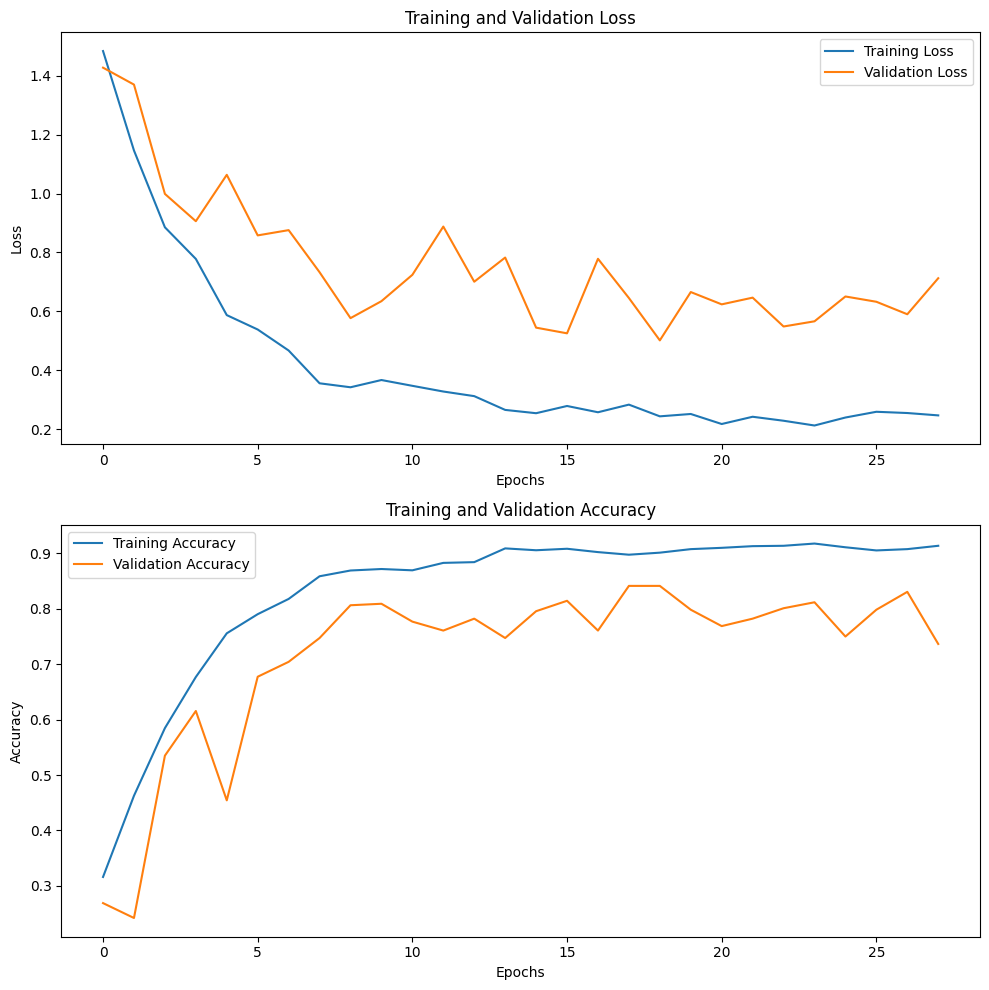

Test Accuracy: 0.8262032085561497


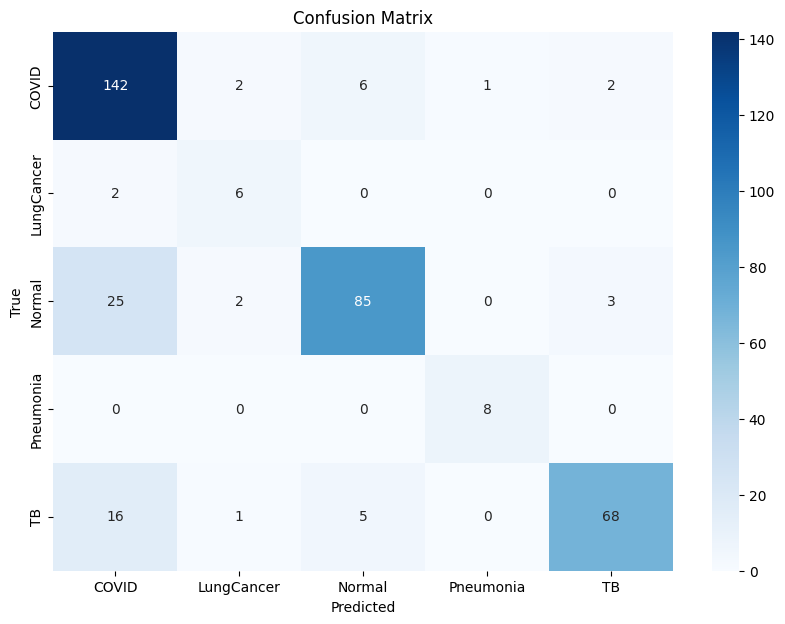

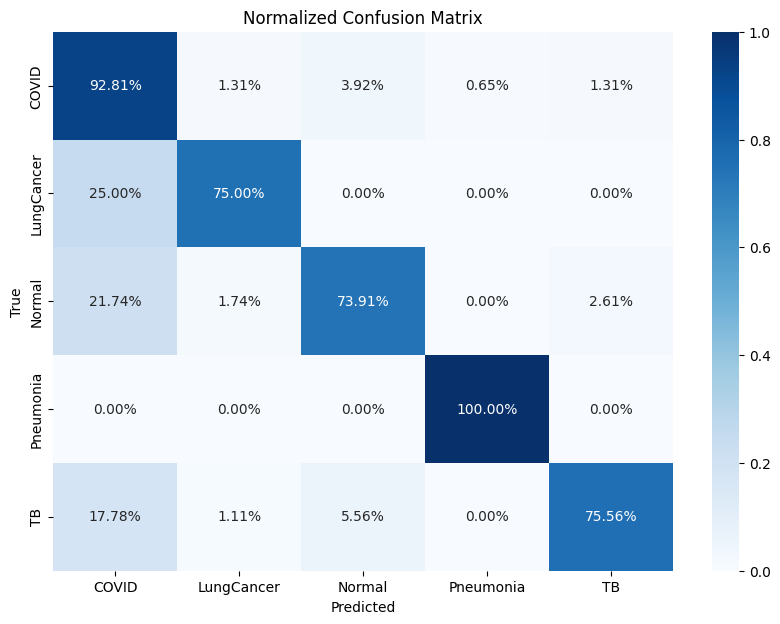

Classification Report:
              precision    recall  f1-score   support

       COVID       0.77      0.93      0.84       153
  LungCancer       0.55      0.75      0.63         8
      Normal       0.89      0.74      0.81       115
   Pneumonia       0.89      1.00      0.94         8
          TB       0.93      0.76      0.83        90

    accuracy                           0.83       374
   macro avg       0.80      0.83      0.81       374
weighted avg       0.84      0.83      0.83       374



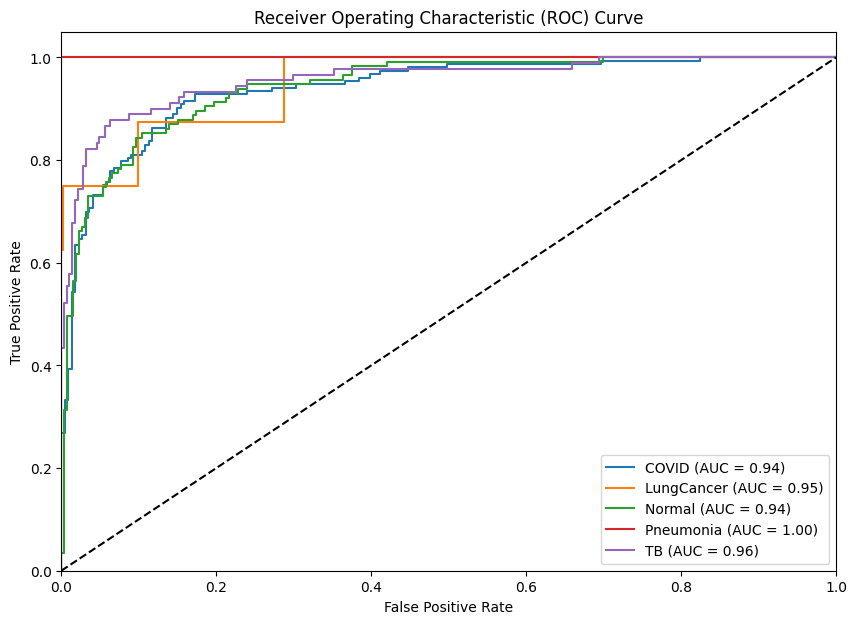

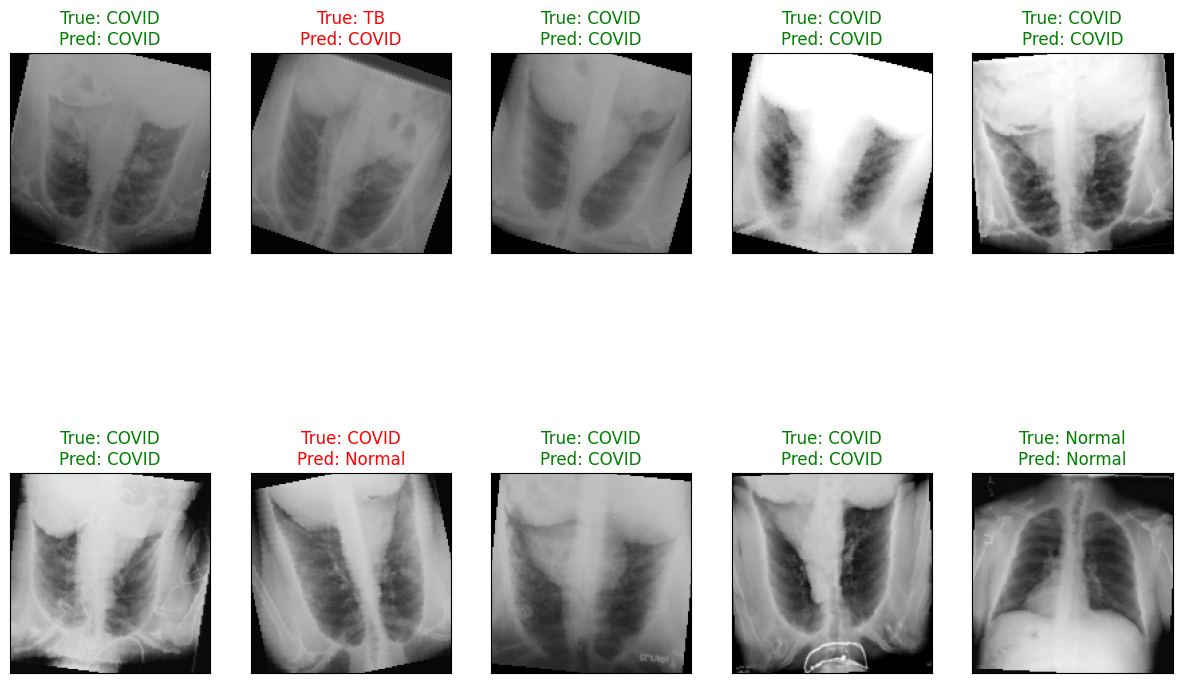

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://83615b218843dc3e29.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, random_split, WeightedRandomSampler
from torchvision import transforms, models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from google.colab import drive
from PIL import Image
import matplotlib.pyplot as plt
import gradio as gr
from collections import Counter

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Define paths
base_path = '/content/drive/MyDrive/XVI/Datas'

# Ensure subdirectories exist
classes = ['COVID', 'LungCancer', 'Normal', 'Pneumonia', 'TB']
for cls in classes:
    if not os.path.exists(os.path.join(base_path, cls)):
        raise FileNotFoundError(f"Subdirectory '{os.path.join(base_path, cls)}' does not exist. Please check the path.")

# Custom Dataset class
class CustomImageDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert('RGB')
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# Load image paths and labels
image_paths = []
labels = []

for idx, cls in enumerate(classes):
    cls_dir = os.path.join(base_path, cls)
    cls_paths = [os.path.join(cls_dir, img) for img in os.listdir(cls_dir) if img.endswith('.jpg') or img.endswith('.png')]
    image_paths.extend(cls_paths)
    labels.extend([idx] * len(cls_paths))

# Calculate class weights
class_counts = Counter(labels)
total_samples = sum(class_counts.values())
class_weights = {cls: total_samples / class_counts.get(cls, 1) for cls in range(len(classes))}

# Debugging: Print class weights and class counts
print(f"class_counts: {class_counts}")
print(f"class_weights: {class_weights}")

sample_weights = [class_weights[label] for label in labels]

# Define transforms with data augmentation
transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))  # Normalization used by ResNet
])

# Create the dataset
dataset = CustomImageDataset(image_paths, labels, transform=transform)

# Split the data into training, devset, and test sets
partitions = [0.8, 0.1, 0.1]

train_size = int(partitions[0] * len(dataset))
test_dev_size = len(dataset) - train_size
dev_size = int(partitions[1] * len(dataset))
test_size = test_dev_size - dev_size

train_data, test_dev_data = random_split(dataset, [train_size, test_dev_size])
dev_data, test_data = random_split(test_dev_data, [dev_size, test_size])

# Create samplers
train_sampler = WeightedRandomSampler(weights=sample_weights[:train_size], num_samples=train_size, replacement=True)
train_loader = DataLoader(train_data, batch_size=32, sampler=train_sampler)
dev_loader = DataLoader(dev_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Using a pre-trained ResNet50 model with additional layers and batch normalization
class FineTunedResNet(nn.Module):
    def __init__(self):
        super(FineTunedResNet, self).__init__()
        self.resnet = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)  # Updated for weights

        # Replace the fully connected layer with more layers and batch normalization
        self.resnet.fc = nn.Sequential(
            nn.Linear(self.resnet.fc.in_features, 1024),  # First additional layer
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, 512),  # Second additional layer
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 256),  # Third additional layer
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, len(classes))  # Output layer, Softmax will be applied in the loss function
        )

    def forward(self, x):
        return self.resnet(x)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the model, loss function, and optimizer with Adam
model = FineTunedResNet().to(device)
class_weights_tensor = torch.tensor([class_weights[i] for i in range(len(classes))], device=device)
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)  # Adjust weight_decay for regularization strength

# Define a learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# Function to train and validate the model with early stopping
def train_validate_early_stopping(model, train_loader, dev_loader, criterion, optimizer, scheduler, num_epochs, save_path, patience):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    best_val_acc = 0.0
    best_epoch = 0
    patience_counter = 0

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_losses.append(running_loss / len(train_loader))
        train_accuracies.append(correct / total)

        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for images, labels in dev_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_losses.append(val_loss / len(dev_loader))
        val_accuracies.append(correct / total)

        # Save the best model based on validation accuracy
        if val_accuracies[-1] > best_val_acc:
            best_val_acc = val_accuracies[-1]
            best_epoch = epoch
            patience_counter = 0
            torch.save(model.state_dict(), save_path)
        else:
            patience_counter += 1

        # Early stopping
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

        # Step the scheduler
        scheduler.step()

        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {running_loss/len(train_loader)}, Val Loss: {val_loss/len(dev_loader)}, Train Acc: {train_accuracies[-1]}, Val Acc: {val_accuracies[-1]}')

    print(f"Best Validation Accuracy: {best_val_acc} at epoch {best_epoch+1}")
    return train_losses, val_losses, train_accuracies, val_accuracies

# Train and validate the model with the scheduler and early stopping
num_epochs = 100
patience = 10
best_model_path = '/content/drive/MyDrive/best_fine_tuned_resnet50.pth'
train_losses, val_losses, train_accuracies, val_accuracies = train_validate_early_stopping(
    model, train_loader, dev_loader, criterion, optimizer, scheduler, num_epochs, best_model_path, patience
)

# Determine the number of epochs actually run
num_actual_epochs = len(train_losses)

# Plotting the results
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
axs[0].plot(range(num_actual_epochs), train_losses, label='Training Loss')
axs[0].plot(range(num_actual_epochs), val_losses, label='Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(loc='best')
axs[0].set_title('Training and Validation Loss')

axs[1].plot(range(num_actual_epochs), train_accuracies, label='Training Accuracy')
axs[1].plot(range(num_actual_epochs), val_accuracies, label='Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(loc='best')
axs[1].set_title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

# Load the best model for evaluation
model.load_state_dict(torch.load(best_model_path))
model.eval()
y_pred = []
y_true = []
y_pred_prob = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        y_pred.extend(preds.tolist())
        y_true.extend(labels.tolist())
        y_pred_prob.extend(F.softmax(outputs, dim=1).cpu().numpy())

accuracy = accuracy_score(y_true, y_pred)
print(f'Test Accuracy: {accuracy}')

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=list(range(len(classes))))

# Display the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Normalized confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm / cm.sum(axis=1)[:, np.newaxis], annot=True, fmt='.2%', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()

# Print classification report
print('Classification Report:')
print(classification_report(y_true, y_pred, target_names=classes))

# ROC Curve and AUC
y_true_one_hot = np.eye(len(classes))[y_true]  # One-hot encode the true labels
y_pred_prob = np.array(y_pred_prob)

fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 7))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'{classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Save the final model
torch.save(model.state_dict(), '/content/drive/MyDrive/final_fine_tuned_resnet_lung_cancer_test_50.pth')

# Sample Predictions Visualization
def visualize_sample_predictions(model, test_loader, classes):
    model.eval()
    images, labels = next(iter(test_loader))
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

    fig = plt.figure(figsize=(15, 10))
    for idx in range(10):
        ax = fig.add_subplot(2, 5, idx+1, xticks=[], yticks=[])
        img = images[idx].cpu().numpy().transpose((1, 2, 0))
        # Unnormalize the image
        img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        img = np.clip(img, 0, 1)
        ax.imshow(img)
        ax.set_title(f"True: {classes[labels[idx]]}\nPred: {classes[preds[idx]]}", color=("green" if preds[idx] == labels[idx] else "red"))

    plt.show()

# Visualize sample predictions
visualize_sample_predictions(model, test_loader, classes)

# Define the Gradio interface with the updated API
def predict(image):
    image = transform(image).unsqueeze(0).to(device)
    model.eval()
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)
        return classes[predicted.item()]

interface = gr.Interface(
    fn=predict,
    inputs=gr.components.Image(type="pil"),
    outputs=gr.components.Label()
)

# Launch the interface
interface.launch()


#Model Tunning for over fitting

In [ ]:
!pip install optuna
!pip install gradio

[I 2024-06-20 19:24:32,707] A new study created in memory with name: no-name-218e3445-2dde-4e44-bb4f-0c4413343b9f


Mounted at /content/drive
class_counts: Counter({0: 1599, 2: 1273, 3: 1032, 4: 860, 1: 52})
class_weights: {0: 3.0118824265165727, 1: 92.61538461538461, 2: 3.7831893165750197, 3: 4.666666666666667, 4: 5.6}


[I 2024-06-20 19:30:20,765] Trial 0 finished with value: 0.896049896049896 and parameters: {'lr': 0.00012824961087183888, 'weight_decay': 9.719567029627094e-06}. Best is trial 0 with value: 0.896049896049896.
[I 2024-06-20 19:36:00,572] Trial 1 finished with value: 0.8856548856548857 and parameters: {'lr': 0.0004069178724099627, 'weight_decay': 2.658669412152804e-05}. Best is trial 0 with value: 0.896049896049896.
[I 2024-06-20 19:41:40,126] Trial 2 finished with value: 0.7900207900207901 and parameters: {'lr': 0.0007772537227751889, 'weight_decay': 0.0002255547299142897}. Best is trial 0 with value: 0.896049896049896.
[I 2024-06-20 19:47:20,897] Trial 3 finished with value: 0.841995841995842 and parameters: {'lr': 4.515423650717013e-05, 'weight_decay': 0.002286502250664667}. Best is trial 0 with value: 0.896049896049896.
[I 2024-06-20 19:53:00,034] Trial 4 finished with value: 0.8773388773388774 and parameters: {'lr': 7.722209132245681e-05, 'weight_decay': 6.0011979584361125e-06}. Bes

Best hyperparameters: {'lr': 0.00019103132087104055, 'weight_decay': 5.502112415037611e-06}
Epoch 1/100, Train Loss: 1.3707330916538711, Val Loss: 1.033446729183197, Train Acc: 0.4151090342679128, Val Acc: 0.6777546777546778
Epoch 2/100, Train Loss: 0.8072092387794463, Val Loss: 0.6938068810850382, Train Acc: 0.7162512980269989, Val Acc: 0.7422037422037422
Epoch 3/100, Train Loss: 0.5479009551696541, Val Loss: 0.6174306942848489, Train Acc: 0.8032191069574247, Val Acc: 0.8066528066528067
Epoch 4/100, Train Loss: 0.47794049177780623, Val Loss: 0.44017872563927085, Train Acc: 0.843717549325026, Val Acc: 0.8440748440748441
Epoch 5/100, Train Loss: 0.4102144509184459, Val Loss: 0.4893176257610321, Train Acc: 0.8696780893042575, Val Acc: 0.841995841995842
Epoch 6/100, Train Loss: 0.3444331176271123, Val Loss: 0.3629609840136254, Train Acc: 0.8746105919003115, Val Acc: 0.8544698544698545
Epoch 7/100, Train Loss: 0.3309904649114806, Val Loss: 0.41792633332079276, Train Acc: 0.8798026998961579

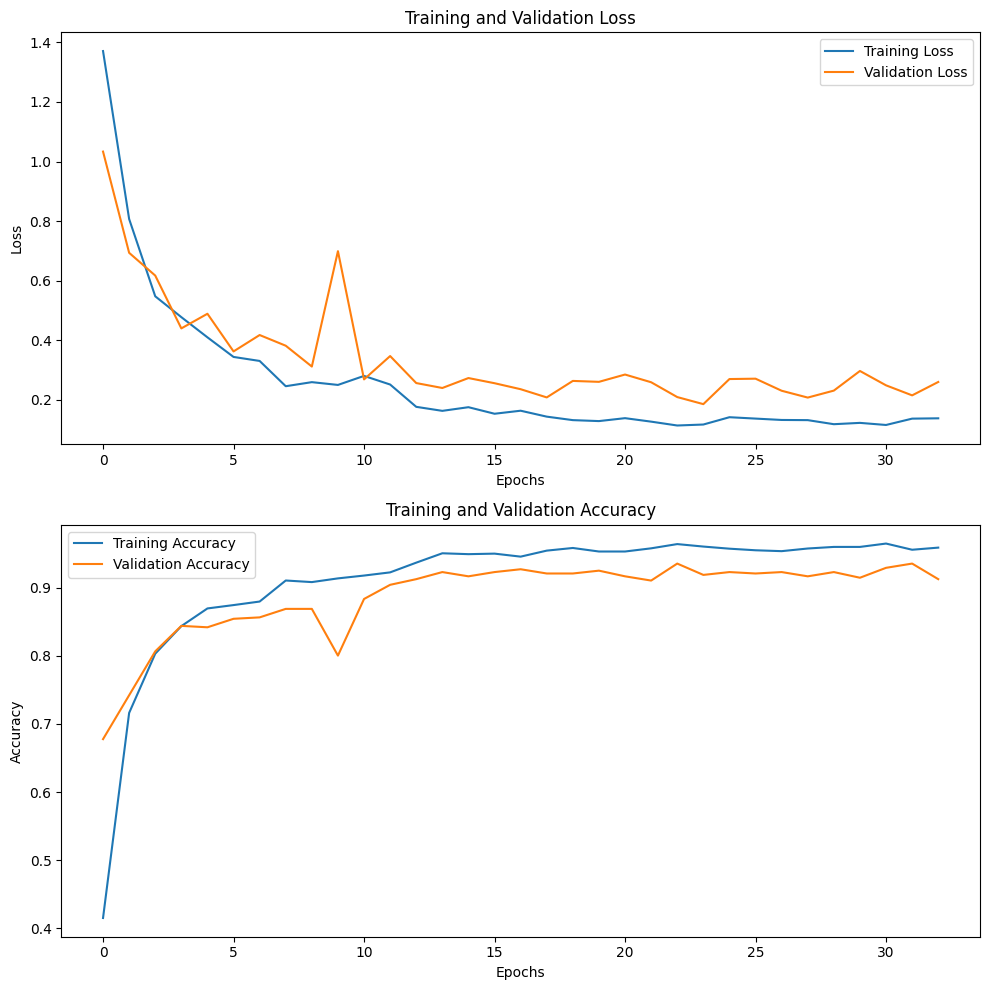

Test Accuracy: 0.9358178053830227


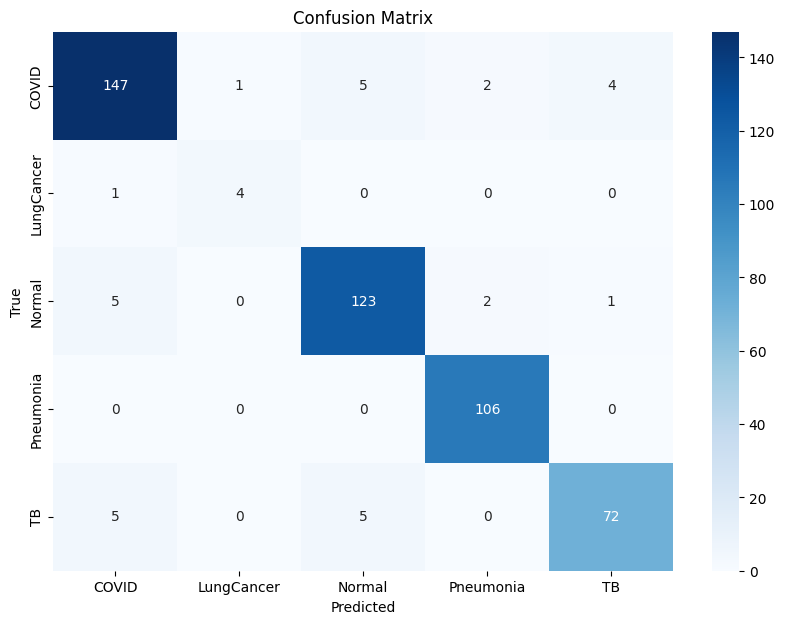

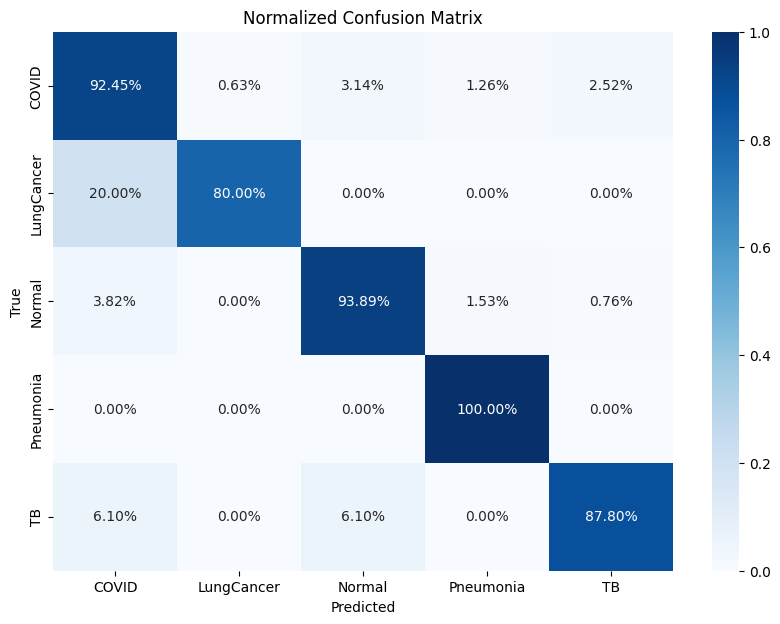

Classification Report:
              precision    recall  f1-score   support

       COVID       0.93      0.92      0.93       159
  LungCancer       0.80      0.80      0.80         5
      Normal       0.92      0.94      0.93       131
   Pneumonia       0.96      1.00      0.98       106
          TB       0.94      0.88      0.91        82

    accuracy                           0.94       483
   macro avg       0.91      0.91      0.91       483
weighted avg       0.94      0.94      0.94       483



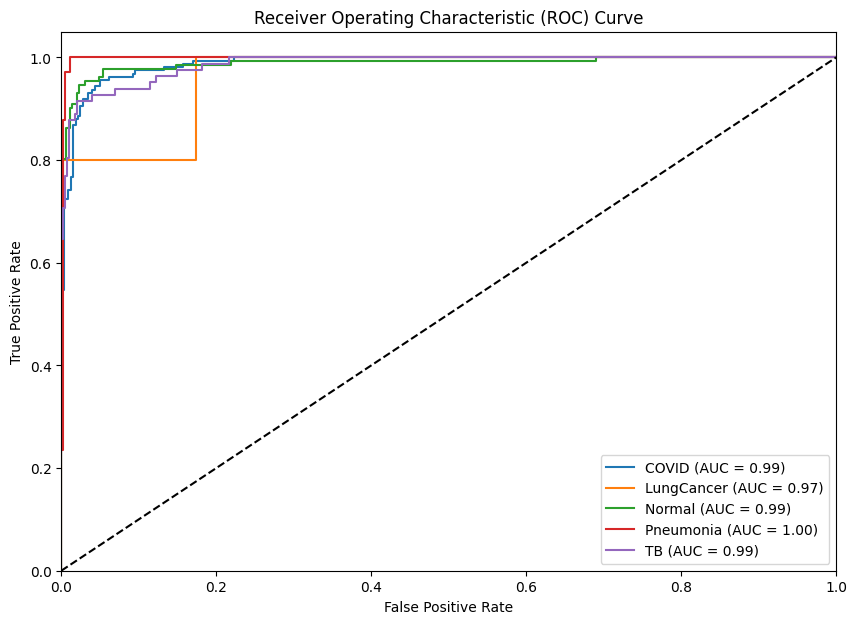

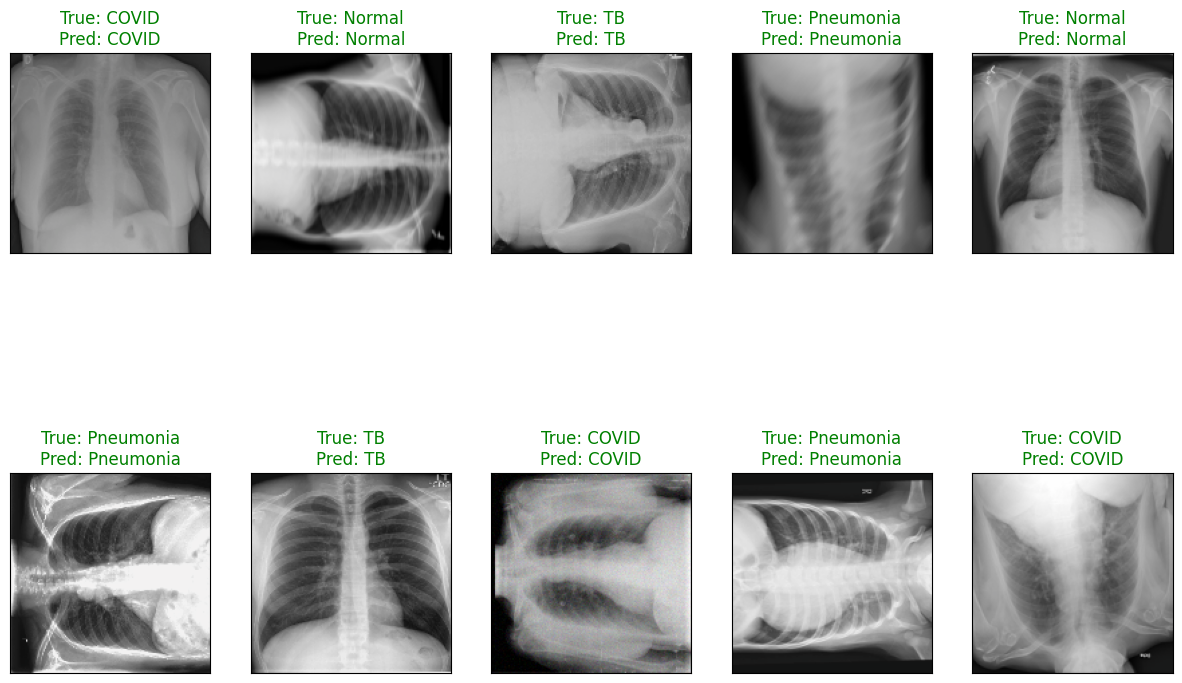

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://d21844dafbef8540f9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:

import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, random_split, WeightedRandomSampler
from torchvision import transforms, models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from google.colab import drive
from PIL import Image
import matplotlib.pyplot as plt
import gradio as gr
from collections import Counter
import optuna

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Define paths
base_path = '/content/drive/MyDrive/XVI/Datas'

# Ensure subdirectories exist
classes = ['COVID', 'LungCancer', 'Normal', 'Pneumonia', 'TB']
for cls in classes:
    if not os.path.exists(os.path.join(base_path, cls)):
        raise FileNotFoundError(f"Subdirectory '{os.path.join(base_path, cls)}' does not exist. Please check the path.")

# Custom Dataset class
class CustomImageDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert('RGB')
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image=np.array(image))['image']
        return image, label

# Load image paths and labels
image_paths = []
labels = []

for idx, cls in enumerate(classes):
    cls_dir = os.path.join(base_path, cls)
    cls_paths = [os.path.join(cls_dir, img) for img in os.listdir(cls_dir) if img.endswith('.jpg') or img.endswith('.png')]
    image_paths.extend(cls_paths)
    labels.extend([idx] * len(cls_paths))

# Calculate class weights
class_counts = Counter(labels)
total_samples = sum(class_counts.values())
class_weights = {cls: total_samples / class_counts.get(cls, 1) for cls in range(len(classes))}

# Debugging: Print class weights and class counts
print(f"class_counts: {class_counts}")
print(f"class_weights: {class_weights}")

sample_weights = [class_weights[label] for label in labels]

# Define transforms with data augmentation using Albumentations
import albumentations as A
from albumentations.pytorch import ToTensorV2

transform = A.Compose([
    A.Resize(150, 150),
    A.HorizontalFlip(),
    A.VerticalFlip(),
    A.RandomRotate90(),
    A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    A.OneOf([
        A.GaussianBlur(),
        A.GaussNoise(),
        A.MotionBlur()
    ], p=0.3),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

# Create the dataset
dataset = CustomImageDataset(image_paths, labels, transform=transform)

# Split the data into training, devset, and test sets
partitions = [0.8, 0.1, 0.1]

train_size = int(partitions[0] * len(dataset))
test_dev_size = len(dataset) - train_size
dev_size = int(partitions[1] * len(dataset))
test_size = test_dev_size - dev_size

train_data, test_dev_data = random_split(dataset, [train_size, test_dev_size])
dev_data, test_data = random_split(test_dev_data, [dev_size, test_size])

# Create samplers
train_sampler = WeightedRandomSampler(weights=sample_weights[:train_size], num_samples=train_size, replacement=True)
train_loader = DataLoader(train_data, batch_size=32, sampler=train_sampler)
dev_loader = DataLoader(dev_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Using a pre-trained ResNet50 model with additional layers and batch normalization
class FineTunedResNet(nn.Module):
    def __init__(self):
        super(FineTunedResNet, self).__init__()
        self.resnet = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)  # Updated for weights

        # Replace the fully connected layer with more layers and batch normalization
        self.resnet.fc = nn.Sequential(
            nn.Linear(self.resnet.fc.in_features, 1024),  # First additional layer
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, 512),  # Second additional layer
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 256),  # Third additional layer
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, len(classes))  # Output layer, Softmax will be applied in the loss function
        )

    def forward(self, x):
        return self.resnet(x)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the objective function for Optuna
def objective(trial):
    # Hyperparameters to tune
    lr = trial.suggest_float('lr', 1e-5, 1e-3, log=True)
    weight_decay = trial.suggest_float('weight_decay', 1e-6, 1e-2, log=True)

    # Initialize the model, loss function, and optimizer with Adam
    model = FineTunedResNet().to(device)
    class_weights_tensor = torch.tensor([class_weights[i] for i in range(len(classes))], device=device)
    criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    # Define a learning rate scheduler
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

    num_epochs = 10  # Use fewer epochs for tuning
    best_val_acc = 0.0

    for epoch in range(num_epochs):
        model.train()
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in dev_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_acc = correct / total
        if val_acc > best_val_acc:
            best_val_acc = val_acc

    return best_val_acc

# Create an Optuna study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Get the best hyperparameters
best_params = study.best_params
print('Best hyperparameters:', best_params)

# Train the final model with the best hyperparameters
model = FineTunedResNet().to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
optimizer = optim.Adam(model.parameters(), lr=best_params['lr'], weight_decay=best_params['weight_decay'])
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# Function to train and validate the model with early stopping
def train_validate_early_stopping(model, train_loader, dev_loader, criterion, optimizer, scheduler, num_epochs, save_path, patience):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    best_val_acc = 0.0
    best_epoch = 0
    patience_counter = 0

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_losses.append(running_loss / len(train_loader))
        train_accuracies.append(correct / total)

        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for images, labels in dev_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_losses.append(val_loss / len(dev_loader))
        val_accuracies.append(correct / total)

        # Save the best model based on validation accuracy
        if val_accuracies[-1] > best_val_acc:
            best_val_acc = val_accuracies[-1]
            best_epoch = epoch
            patience_counter = 0
            torch.save(model.state_dict(), save_path)
        else:
            patience_counter += 1

        # Early stopping
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

        # Step the scheduler
        scheduler.step()

        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {running_loss/len(train_loader)}, Val Loss: {val_loss/len(dev_loader)}, Train Acc: {train_accuracies[-1]}, Val Acc: {val_accuracies[-1]}')

    print(f"Best Validation Accuracy: {best_val_acc} at epoch {best_epoch+1}")
    return train_losses, val_losses, train_accuracies, val_accuracies

# Train and validate the model with the scheduler and early stopping
num_epochs = 100
patience = 10
best_model_path = '/content/drive/MyDrive/best_fine_tuned_resnet50.pth'
train_losses, val_losses, train_accuracies, val_accuracies = train_validate_early_stopping(
    model, train_loader, dev_loader, criterion, optimizer, scheduler, num_epochs, best_model_path, patience
)

# Determine the number of epochs actually run
num_actual_epochs = len(train_losses)

# Plotting the results
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
axs[0].plot(range(num_actual_epochs), train_losses, label='Training Loss')
axs[0].plot(range(num_actual_epochs), val_losses, label='Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(loc='best')
axs[0].set_title('Training and Validation Loss')

axs[1].plot(range(num_actual_epochs), train_accuracies, label='Training Accuracy')
axs[1].plot(range(num_actual_epochs), val_accuracies, label='Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(loc='best')
axs[1].set_title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

# Load the best model for evaluation
model.load_state_dict(torch.load(best_model_path))
model.eval()
y_pred = []
y_true = []
y_pred_prob = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        y_pred.extend(preds.tolist())
        y_true.extend(labels.tolist())
        y_pred_prob.extend(F.softmax(outputs, dim=1).cpu().numpy())

accuracy = accuracy_score(y_true, y_pred)
print(f'Test Accuracy: {accuracy}')

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=list(range(len(classes))))

# Display the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Normalized confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm / cm.sum(axis=1)[:, np.newaxis], annot=True, fmt='.2%', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()

# Print classification report
print('Classification Report:')
print(classification_report(y_true, y_pred, target_names=classes))

# ROC Curve and AUC
y_true_one_hot = np.eye(len(classes))[y_true]  # One-hot encode the true labels
y_pred_prob = np.array(y_pred_prob)

fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 7))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'{classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Save the final model
torch.save(model.state_dict(), '/content/drive/MyDrive/final_fine_tuned_resnet_lung_cancer_test_50.pth')

# Sample Predictions Visualization
def visualize_sample_predictions(model, test_loader, classes):
    model.eval()
    images, labels = next(iter(test_loader))
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

    fig = plt.figure(figsize=(15, 10))
    for idx in range(10):
        ax = fig.add_subplot(2, 5, idx+1, xticks=[], yticks=[])
        img = images[idx].cpu().numpy().transpose((1, 2, 0))
        # Unnormalize the image
        img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        img = np.clip(img, 0, 1)
        ax.imshow(img)
        ax.set_title(f"True: {classes[labels[idx]]}\nPred: {classes[preds[idx]]}", color=("green" if preds[idx] == labels[idx] else "red"))

    plt.show()

# Visualize sample predictions
visualize_sample_predictions(model, test_loader, classes)

# Define the Gradio interface with the updated API
def predict(image):
    image = transform(image=np.array(image))['image'].unsqueeze(0).to(device)
    model.eval()
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)
        return classes[predicted.item()]

interface = gr.Interface(
    fn=predict,
    inputs=gr.components.Image(type="pil"),
    outputs=gr.components.Label()
)

# Launch the interface
interface.launch()


#Training

Mounted at /content/drive
class_counts: Counter({0: 1599, 2: 1273, 3: 1032, 4: 860, 1: 52})
class_weights: {0: 3.0118824265165727, 1: 92.61538461538461, 2: 3.7831893165750197, 3: 4.666666666666667, 4: 5.6}
Best hyperparameters: {'lr': 0.00028877715384763937, 'weight_decay': 0.0010977517310350644}
Epoch 1/100, Train Loss: 1.1706012492337503, Val Loss: 0.857301971380366, Train Acc: 0.5430944963655244, Val Acc: 0.6694386694386695
Epoch 2/100, Train Loss: 0.7058562688098466, Val Loss: 0.6840209625370335, Train Acc: 0.7767393561786086, Val Acc: 0.7858627858627859
Epoch 3/100, Train Loss: 0.5496122375253804, Val Loss: 0.7049009982147254, Train Acc: 0.8260643821391485, Val Acc: 0.8087318087318087
Epoch 4/100, Train Loss: 0.4250611542793345, Val Loss: 0.5413699693745002, Train Acc: 0.8616303219106958, Val Acc: 0.8295218295218295
Epoch 5/100, Train Loss: 0.3630608136126818, Val Loss: 0.7078261368442327, Train Acc: 0.8782450674974039, Val Acc: 0.7733887733887734
Epoch 6/100, Train Loss: 0.417221

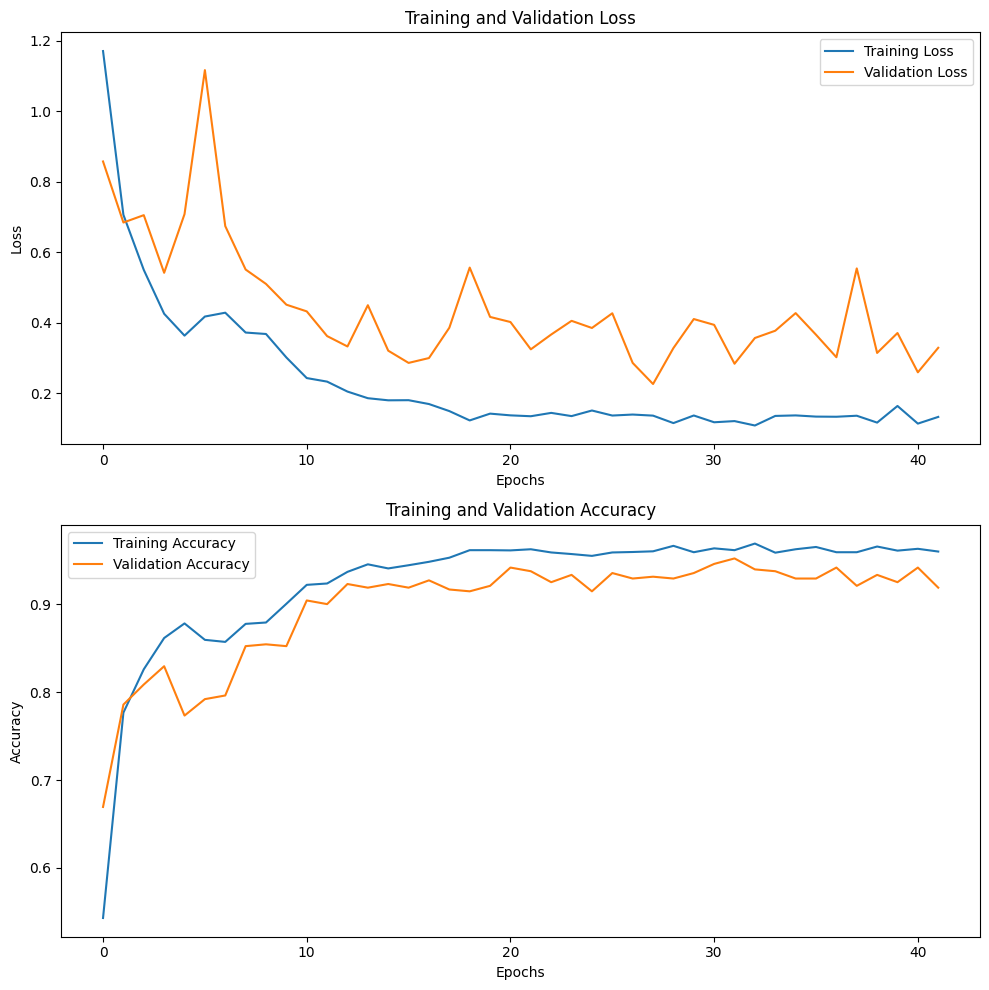

Test Accuracy: 0.937888198757764


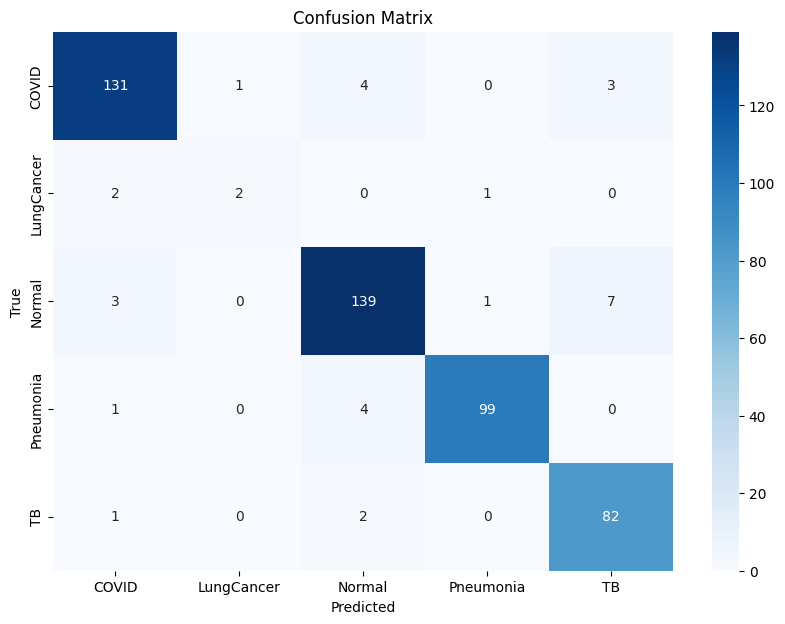

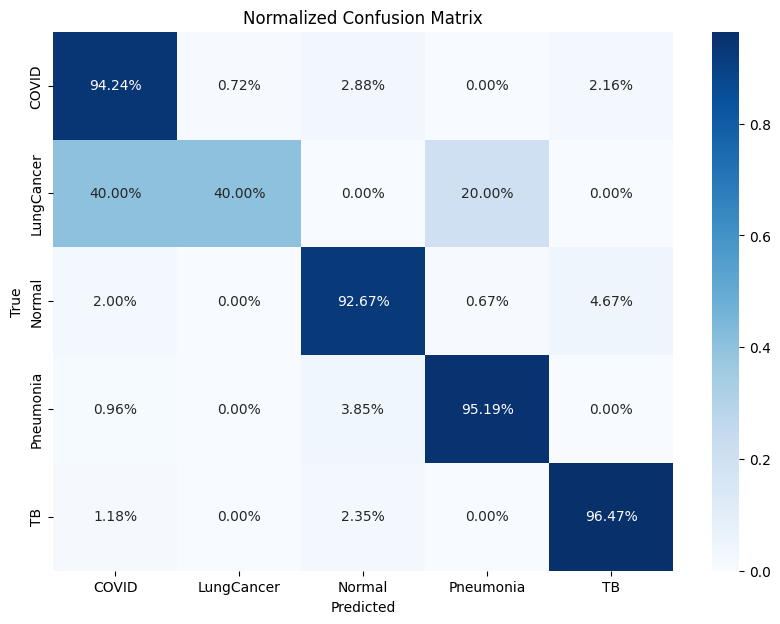

Classification Report:
              precision    recall  f1-score   support

       COVID       0.95      0.94      0.95       139
  LungCancer       0.67      0.40      0.50         5
      Normal       0.93      0.93      0.93       150
   Pneumonia       0.98      0.95      0.97       104
          TB       0.89      0.96      0.93        85

    accuracy                           0.94       483
   macro avg       0.88      0.84      0.85       483
weighted avg       0.94      0.94      0.94       483



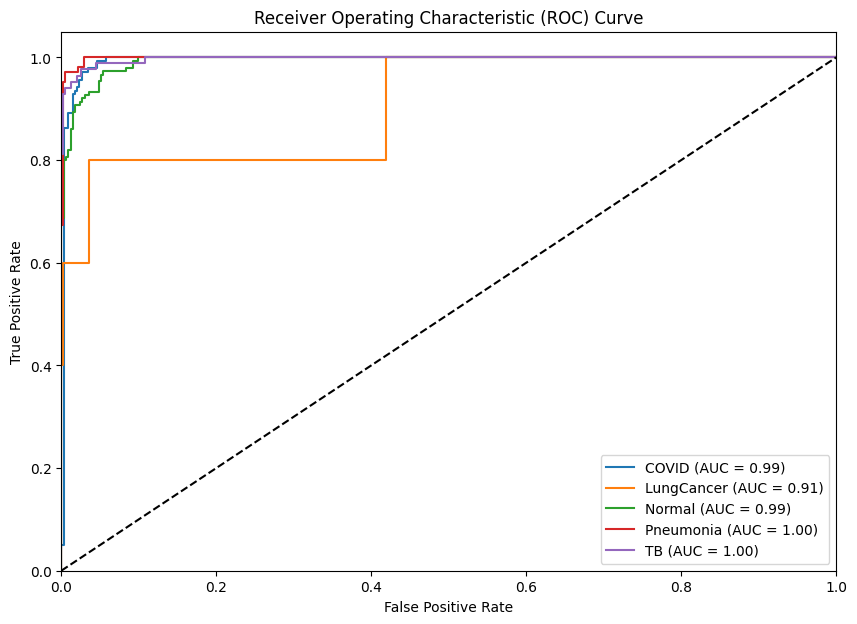

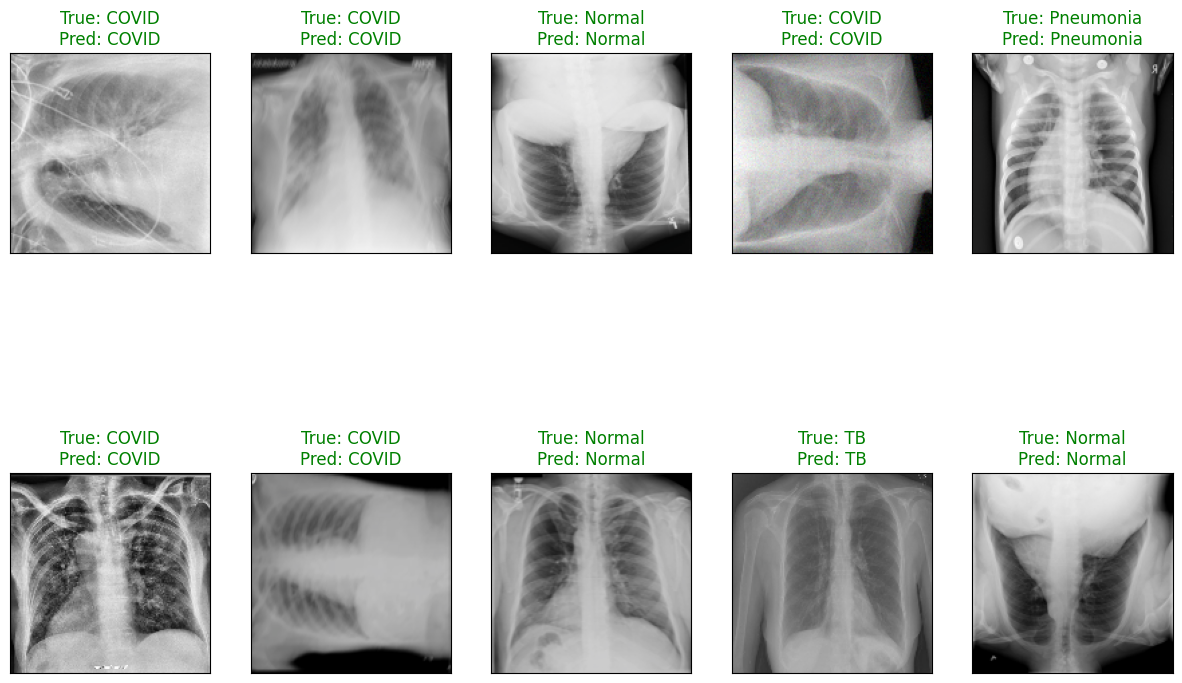

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://e10854434d71de4eb9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, random_split, WeightedRandomSampler
from torchvision import transforms, models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from google.colab import drive
from PIL import Image
import matplotlib.pyplot as plt
import gradio as gr
from collections import Counter
import optuna

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Define paths
base_path = '/content/drive/MyDrive/XVI/Datas'

# Ensure subdirectories exist
classes = ['COVID', 'LungCancer', 'Normal', 'Pneumonia', 'TB']
for cls in classes:
    if not os.path.exists(os.path.join(base_path, cls)):
        raise FileNotFoundError(f"Subdirectory '{os.path.join(base_path, cls)}' does not exist. Please check the path.")

# Custom Dataset class
class CustomImageDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert('RGB')
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image=np.array(image))['image']
        return image, label

# Load image paths and labels
image_paths = []
labels = []

for idx, cls in enumerate(classes):
    cls_dir = os.path.join(base_path, cls)
    cls_paths = [os.path.join(cls_dir, img) for img in os.listdir(cls_dir) if img.endswith('.jpg') or img.endswith('.png')]
    image_paths.extend(cls_paths)
    labels.extend([idx] * len(cls_paths))

# Calculate class weights
class_counts = Counter(labels)
total_samples = sum(class_counts.values())
class_weights = {cls: total_samples / class_counts.get(cls, 1) for cls in range(len(classes))}

# Debugging: Print class weights and class counts
print(f"class_counts: {class_counts}")
print(f"class_weights: {class_weights}")

sample_weights = [class_weights[label] for label in labels]

# Define transforms with data augmentation using Albumentations
import albumentations as A
from albumentations.pytorch import ToTensorV2

transform = A.Compose([
    A.Resize(150, 150),
    A.HorizontalFlip(),
    A.VerticalFlip(),
    A.RandomRotate90(),
    A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    A.OneOf([
        A.GaussianBlur(),
        A.GaussNoise(),
        A.MotionBlur()
    ], p=0.3),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

# Create the dataset
dataset = CustomImageDataset(image_paths, labels, transform=transform)

# Split the data into training, devset, and test sets
partitions = [0.8, 0.1, 0.1]

train_size = int(partitions[0] * len(dataset))
test_dev_size = len(dataset) - train_size
dev_size = int(partitions[1] * len(dataset))
test_size = test_dev_size - dev_size

train_data, test_dev_data = random_split(dataset, [train_size, test_dev_size])
dev_data, test_data = random_split(test_dev_data, [dev_size, test_size])

# Create samplers
train_sampler = WeightedRandomSampler(weights=sample_weights[:train_size], num_samples=train_size, replacement=True)
train_loader = DataLoader(train_data, batch_size=32, sampler=train_sampler)
dev_loader = DataLoader(dev_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Using a pre-trained ResNet50 model with additional layers and batch normalization
class FineTunedResNet(nn.Module):
    def __init__(self):
        super(FineTunedResNet, self).__init__()
        self.resnet = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)  # Updated for weights

        # Replace the fully connected layer with more layers and batch normalization
        self.resnet.fc = nn.Sequential(
            nn.Linear(self.resnet.fc.in_features, 1024),  # First additional layer
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, 512),  # Second additional layer
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 256),  # Third additional layer
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, len(classes))  # Output layer, Softmax will be applied in the loss function
        )

    def forward(self, x):
        return self.resnet(x)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Get the best hyperparameters from Optuna study
best_params = {'lr': 0.00028877715384763937, 'weight_decay': 0.0010977517310350644}
print('Best hyperparameters:', best_params)

# Train the final model with the best hyperparameters
model = FineTunedResNet().to(device)
class_weights_tensor = torch.tensor([class_weights[i] for i in range(len(classes))], device=device)
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
optimizer = optim.Adam(model.parameters(), lr=best_params['lr'], weight_decay=best_params['weight_decay'])
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# Function to train and validate the model with early stopping
def train_validate_early_stopping(model, train_loader, dev_loader, criterion, optimizer, scheduler, num_epochs, save_path, patience):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    best_val_acc = 0.0
    best_epoch = 0
    patience_counter = 0

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_losses.append(running_loss / len(train_loader))
        train_accuracies.append(correct / total)

        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for images, labels in dev_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_losses.append(val_loss / len(dev_loader))
        val_accuracies.append(correct / total)

        # Save the best model based on validation accuracy
        if val_accuracies[-1] > best_val_acc:
            best_val_acc = val_accuracies[-1]
            best_epoch = epoch
            patience_counter = 0
            torch.save(model.state_dict(), save_path)
        else:
            patience_counter += 1

        # Early stopping
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

        # Step the scheduler
        scheduler.step()

        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {running_loss/len(train_loader)}, Val Loss: {val_loss/len(dev_loader)}, Train Acc: {train_accuracies[-1]}, Val Acc: {val_accuracies[-1]}')

    print(f"Best Validation Accuracy: {best_val_acc} at epoch {best_epoch+1}")
    return train_losses, val_losses, train_accuracies, val_accuracies

# Train and validate the model with the scheduler and early stopping
num_epochs = 100
patience = 10
best_model_path = '/content/drive/MyDrive/best_fine_tuned_resnet50.pth'
train_losses, val_losses, train_accuracies, val_accuracies = train_validate_early_stopping(
    model, train_loader, dev_loader, criterion, optimizer, scheduler, num_epochs, best_model_path, patience
)

# Determine the number of epochs actually run
num_actual_epochs = len(train_losses)

# Plotting the results
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
axs[0].plot(range(num_actual_epochs), train_losses, label='Training Loss')
axs[0].plot(range(num_actual_epochs), val_losses, label='Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(loc='best')
axs[0].set_title('Training and Validation Loss')

axs[1].plot(range(num_actual_epochs), train_accuracies, label='Training Accuracy')
axs[1].plot(range(num_actual_epochs), val_accuracies, label='Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(loc='best')
axs[1].set_title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

# Load the best model for evaluation
model.load_state_dict(torch.load(best_model_path))
model.eval()
y_pred = []
y_true = []
y_pred_prob = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        y_pred.extend(preds.tolist())
        y_true.extend(labels.tolist())
        y_pred_prob.extend(F.softmax(outputs, dim=1).cpu().numpy())

accuracy = accuracy_score(y_true, y_pred)
print(f'Test Accuracy: {accuracy}')

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=list(range(len(classes))))

# Display the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Normalized confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm / cm.sum(axis=1)[:, np.newaxis], annot=True, fmt='.2%', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()

# Print classification report
print('Classification Report:')
print(classification_report(y_true, y_pred, target_names=classes))

# ROC Curve and AUC
y_true_one_hot = np.eye(len(classes))[y_true]  # One-hot encode the true labels
y_pred_prob = np.array(y_pred_prob)

fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 7))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'{classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Save the final model
torch.save(model.state_dict(), '/content/drive/MyDrive/final_fine_tuned_resnet_lung_cancer_test_50.pth')

# Sample Predictions Visualization
def visualize_sample_predictions(model, test_loader, classes):
    model.eval()
    images, labels = next(iter(test_loader))
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

    fig = plt.figure(figsize=(15, 10))
    for idx in range(10):
        ax = fig.add_subplot(2, 5, idx+1, xticks=[], yticks=[])
        img = images[idx].cpu().numpy().transpose((1, 2, 0))
        # Unnormalize the image
        img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        img = np.clip(img, 0, 1)
        ax.imshow(img)
        ax.set_title(f"True: {classes[labels[idx]]}\nPred: {classes[preds[idx]]}", color=("green" if preds[idx] == labels[idx] else "red"))

    plt.show()

# Visualize sample predictions
visualize_sample_predictions(model, test_loader, classes)

# Define the Gradio interface with the updated API
def predict(image):
    image = transform(image=np.array(image))['image'].unsqueeze(0).to(device)
    model.eval()
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)
        return classes[predicted.item()]

interface = gr.Interface(
    fn=predict,
    inputs=gr.components.Image(type="pil"),
    outputs=gr.components.Label()
)

# Launch the interface
interface.launch()
